# Basic Task

In [48]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(threshold=sys.maxsize, linewidth=100)

## Q - Learning

Code below has been adapted from Tutorial Code 02

### Environment

In [49]:
## ENVIRONMENT 
def environment ():
    # States and Actions
    S = ['A','B','C','D','E','F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','AA','AB','AC','AD','AE','AF', 'AG', 'AH', 'AI', 'AJ']
    A = ['A','B','C','D','E','F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','AA','AB','AC','AD','AE','AF', 'AG', 'AH', 'AI', 'AJ']

    goal_state = 'AH'

    # R matrix
    R =  np.array([[np.nan for a in A] for s in S])
    possible_actions = [(0,1), (0,6), (1,0), (1,2), (1,7), (2,1), (2,3), (2,8), (3,2), (3,4), (3,9),
                        (4,3), (4,5), (4,10), (5,4), (5,11), (6,7), (6,12), (7,6), (7,8),(7,13), 
                        (8,7), (8,9), (8,14), (9,8), (9,10), (9,15), (10,9), (10,11), (10,16), (11,10), (11,17),
                        (12,13), (12,18), (13,14), (13,12), (13,19),(14,13),(14,15),(14,20), (15,14), (15,16), (15,21), 
                        (16,15), (16,17), (16,22), (17,16), (17,23),(18,19), (18,24), (19,18), (19,20), (19,25), 
                        (20,19), (20,21), (20,26), (21,20), (21,22), (21,21),(22,27), (22,23), (22,28), (23,22), (23,29),
                        (24,25), (24,30), (25,24), (25,26), (25,31),(26,25), (26,27), (26,32), (27,26), (27,28), (27,33), 
                        (28,27), (28,29), (28,34), (29,28), (29,35),(30,31), (31,30), (31,32), 
                        (32,31), (32,33), (33,33), (34,33), (34,35), (35,34)]

    for s,a in possible_actions:
        if a == 33:
            R[s,a] = 100
        elif a == 3:
            R[s,a] = -100
        elif a == 13:
            R[s,a] = -100
        elif a == 14:
            R[s,a] = -100
        elif a == 21:
            R[s,a] = -100
        elif a == 25:
            R[s,a] = -100
        elif a == 35:
            R[s,a] = -100
        else:
            R[s,a] = 0

    return(S, A, R, goal_state)



In [50]:
# flattens lists
def flattenList(x):
    flat_list = []
    for sublist in x:
        for item in sublist:
            flat_list.append(item)
    return (flat_list)

### Random Agent 

Text(0, 0.5, 'Reward')

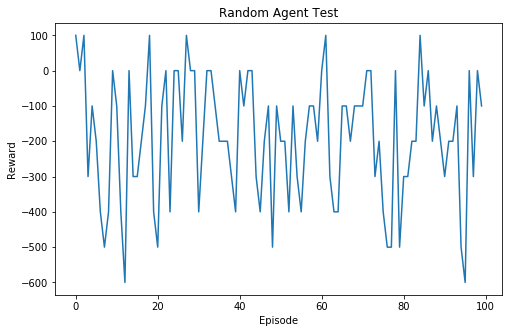

In [51]:
## RANDOM AGENT 

(S, A, R, goal_state) = environment()

tList = []
rList = []
window_ep_rewards = {'ep': [], 'avg': []}
# Run
for episode in range(100):
    
    s = 0
    rAll = 0;
    for timestep in range(500):
        # Action selection
        available_actions = np.where(~np.isnan(R[s]))[0]
        a = np.random.choice(available_actions)

        # Environment updating
        r = R[s,a]
        s_old = s
        s = a 

        # Q value updating
        rAll = rAll + r
        if S[s] == goal_state:
            break 
    tList.append(episode)
    rList.append(rAll)

# Random Agent Test
plt.figure(figsize=(8,5))
plt.plot(tList,rList )
plt.title('Random Agent Test')
plt.xlabel('Episode')
plt.ylabel('Reward')

In [52]:
randomagentreward = np.cumsum(rList)

Text(0, 0.5, 'Cumulative Reward')

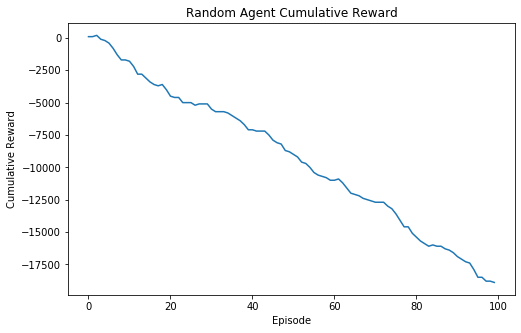

In [53]:
# Random Agent Test
plt.figure(figsize=(8,5))
plt.plot(tList,randomagentreward )
plt.title('Random Agent Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')

In [54]:
min(rList)

-600.0

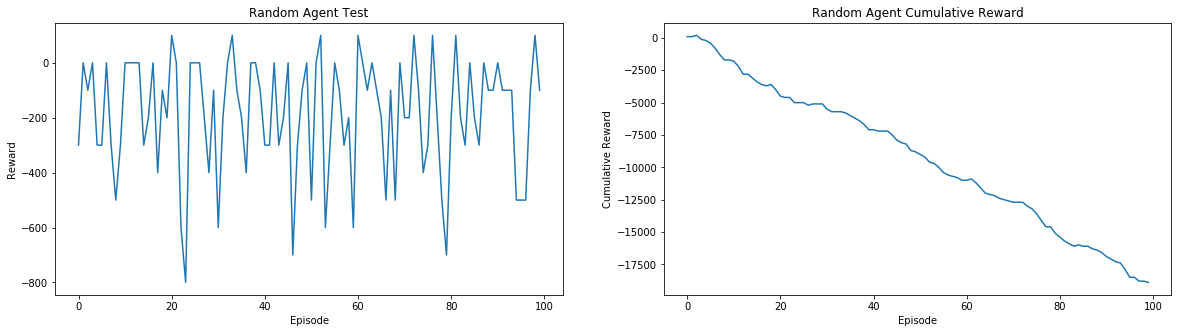

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(tList,rList )
plt.title('Random Agent Test')
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.subplot(1,2,2)
plt.plot(tList,randomagentreward )
plt.title('Random Agent Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

### Q Agent

action: 1
action: 0
action: 6
action: 12
action: 18
action: 24
action: 30
action: 31
action: 32
action: 31
action: 31
action: 30
action: 30
action: 31
action: 30
action: 31
action: 30
action: 31
action: 32
action: 31
action: 30
action: 30
action: 31
action: 30
action: 31
action: 31
action: 30
action: 31
action: 32
action: 31
action: 33
action: 6
action: 12
action: 18
action: 19
action: 25
action: 24
action: 25
action: 26
action: 25
action: 24
action: 30
action: 31
action: 32
action: 33
action: 6
action: 7
action: 6
action: 12
action: 13
action: 12
action: 18
action: 24
action: 30
action: 31
action: 32
action: 33
action: 1
action: 7
action: 8
action: 8
action: 9
action: 8
action: 7
action: 8
action: 7
action: 13
action: 19
action: 18
action: 19
action: 31
action: 32
action: 6
action: 12
action: 18
action: 19
action: 18
action: 24
action: 30
action: 31
action: 32
action: 33
action: 6
action: 12
action: 18
action: 24
action: 30
action: 31
action: 32
action: 33
action: 6
action: 7
action: 

Text(0, 0.5, 'Reward')

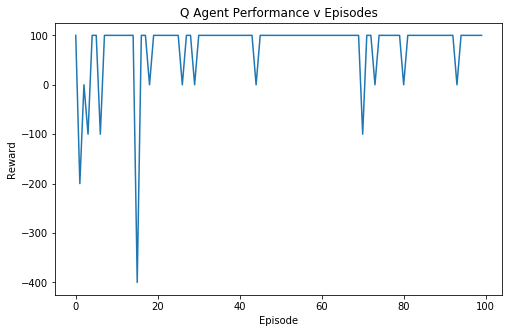

In [55]:
## Q Agent 
# Learning params
alpha = 0.9
gamma = 0.8
epsilon = 0.9
decay = 0.9998 

(S, A, R, goal_state) = environment()

# Q matrix
Q = np.zeros(R.shape)

tList = []
rList = []
# Run
for episode in range(100):
    
    #s = np.random.choice(len(S))
    s = 0
    #print("Starting state is '{}'".format(S[s]))
    rAll = 0;
    for timestep in range(300): 
        # Action selection
        available_actions = np.where(~np.isnan(R[s]))[0]
        q_values = [Q[s,a] for a in available_actions]
        best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
        best_actions_q_values = [Q[s,x] for x in best_actions]
        
        # Epsilon-greedy
        if np.random.uniform() > epsilon:
            a = np.random.choice(available_actions)
        else:
            a = np.random.choice(best_actions)
            print('action:',a)

        # Environment updating
        r = R[s,a]
        s_old = s
        s = a 

        # Q value updating
        Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
        rAll = rAll + r
        if S[s] == goal_state:
            break 
    epsilon = epsilon * decay 
    tList.append(episode)
    rList.append(rAll)

# Q Agent Test
plt.figure(figsize=(8,5))
plt.plot(tList,rList )
plt.title('Q Agent Performance v Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')

In [56]:
Qagentreward = np.cumsum(rList)

Text(0, 0.5, 'Cumulative Reward')

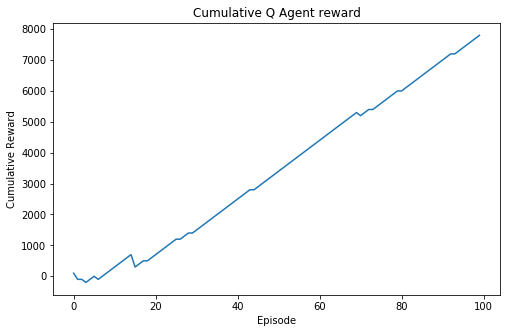

In [57]:
# Random Agent Test
plt.figure(figsize=(8,5))
plt.plot(tList,Qagentreward )
plt.title('Cumulative Q Agent reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')

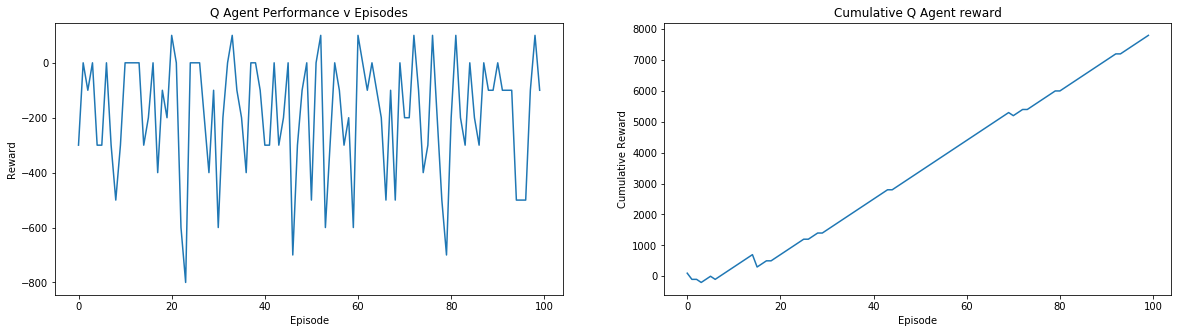

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(tList,rList )
plt.title('Q Agent Performance v Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.subplot(1,2,2)
plt.plot(tList,Qagentreward )
plt.title('Cumulative Q Agent reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

### Single Episode

In [58]:
## Q Agent 
# Learning params
alpha = 0.9
gamma = 0.8
epsilon = 0.9
decay = 0.9998 

(S, A, R, goal_state) = environment()

# Q matrix
Q = np.zeros(R.shape)

s = 0
print("Starting state is '{}'".format(S[s]))

file_name = 0
for i in range(500):
    # Action selection
    available_actions = np.where(~np.isnan(R[s]))[0]
    print("Available actions from state '{}' are: {}".format(S[s], [A[x] for x in available_actions]))

    q_values = [Q[s,a] for a in available_actions]
    print('Q values for those actions from current state: {}'.format(q_values))

    best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
    best_actions_q_values = [Q[s,x] for x in best_actions]

    if len(best_actions) > 1:
        print('Detected multiple actions with identical Q values. Agent will randomly select one of these.')
        print('Our best available actions from here are: {} with current q values: {}'.format(
            [A[x] for x in best_actions], best_actions_q_values))
    
    # Epsilon-greedy
    if np.random.uniform() > epsilon:
        a = np.random.choice(available_actions)
        print("Selecting random action '{}' with current Q value {}".format(A[a], Q[s,a]))
        
        # Update epsilon value
        epsilon = epsilon * decay
        print("Updating epsilon with decay to '{}'".format(epsilon))
        
    else:
        a = np.random.choice(best_actions)
        print("Selecting greedy action '{}' with current Q value {}".format(A[a], Q[s,a]))


    # Environment updating
    r = R[s,a]
    print("Reward for taking action '{}' from state '{}': {}".format(A[a], S[s], r))

    s_old = s
    s = a # here, the transition function is deterministic. Next state corresponds simply to the action taken.
    print("After taking action '{}' from state '{}', new state is '{}'".format(A[a], S[s_old], S[s]))

    # Q value updating
    q_updated = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
    print("Real old Q value used in equation is '{}'".format(Q[s_old,a]))

    Q[s_old,a] = q_updated

    print("Q value update: " \
          "Q({},{}) = Q({},{}) + alpha*(r({},{}) + gamma*max(Q[{},:]) - Q[{},{}]) ".format(
        S[s_old], A[a], S[s_old], A[a], S[s_old], A[a], S[s],S[s_old], A[a]))

    print("Q matrix update: " \
          "Q({},{}) = {} + {}*({} + {}*{} - {}) = {}".format(
        S[s_old], A[a], Q[s_old,a].round(0), alpha, r, gamma, np.max(Q[s,:]).round(0), 
        Q[s_old,a].round(0), q_updated))

    print('Q matrix updated: \n\n {}'.format(Q.round(0)))
           
#     pd.DataFrame(Q).to_csv(str(file_name) + ".csv")
#     file_name += 1

    if S[s] in goal_state:
        print("Goal state '{}' reached. Ending episode.".format(S[s]))
        break

Starting state is 'A'
Available actions from state 'A' are: ['B', 'G']
Q values for those actions from current state: [0.0, 0.0]
Detected multiple actions with identical Q values. Agent will randomly select one of these.
Our best available actions from here are: ['B', 'G'] with current q values: [0.0, 0.0]
Selecting greedy action 'B' with current Q value 0.0
Reward for taking action 'B' from state 'A': 0.0
After taking action 'B' from state 'A', new state is 'B'
Real old Q value used in equation is '0.0'
Q value update: Q(A,B) = Q(A,B) + alpha*(r(A,B) + gamma*max(Q[B,:]) - Q[A,B]) 
Q matrix update: Q(A,B) = 0.0 + 0.9*(0.0 + 0.8*0.0 - 0.0) = 0.0
Q matrix updated: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  

### Vary Alpha

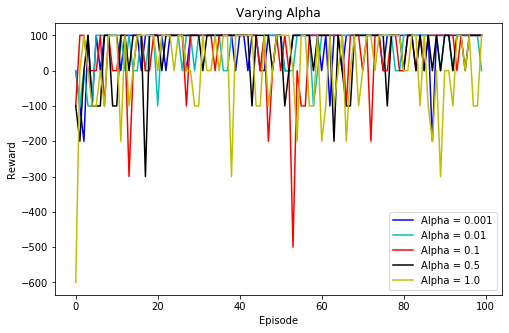

In [59]:
# Learning params
alphas = [0.001, 0.01, 0.1, 0.5, 1.0]
gamma = 0.8
epsilon = 0.9
decay = 0.999 

(S, A, R, goal_state) = environment()

alphaRewards = {0.001: [], 0.01: [], 0.1: [], 0.5: [], 1.0: []}

# Run
for alpha in alphas:
    # Q matrix
    Q = np.zeros(R.shape)
    # Results
    
    episodes = []
    tList = []
    rList = []
    for episode in range(100):

        #s = np.random.choice(len(S))
        s = 0
        #print("Starting state is '{}'".format(S[s]))
        rAll = 0;
        for timestep in range(500): 
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            if np.random.uniform() > epsilon:
                a = np.random.choice(available_actions)
            else:
                a = np.random.choice(best_actions)

            # Environment updating
            r = R[s,a]
            s_old = s
            s = a 

            # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
            rAll = rAll + r
            if S[s] == goal_state:
                break 
        epsilon = epsilon * decay 
        tList.append(episode)
        rList.append(rAll)
    # Store gamma values
    alphaRewards[alpha].append(rList)

# reward
alpha1 = flattenList(alphaRewards[0.001])
alpha2 = flattenList(alphaRewards[0.01])
alpha3 = flattenList(alphaRewards[0.1])
alpha4 = flattenList(alphaRewards[0.5])
alpha5 = flattenList(alphaRewards[1.0])

# test alpha
plt.figure(figsize=(8,5))
plt.plot( tList,alpha1,label = 'Alpha = 0.001', color = 'b')
plt.plot( tList,alpha2,label = 'Alpha = 0.01', color = 'c')
plt.plot( tList,alpha3,label = 'Alpha = 0.1', color = 'r')
plt.plot( tList,alpha4,label = 'Alpha = 0.5', color = 'k')
plt.plot( tList,alpha5,label = 'Alpha = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Alpha')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

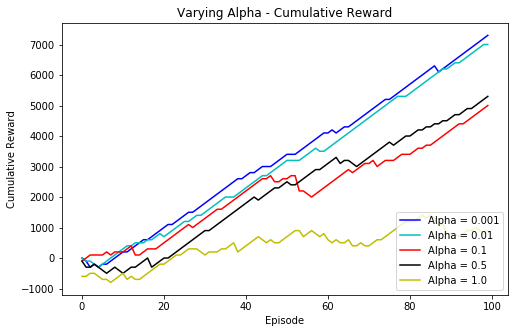

In [60]:
cumalpha1 = np.cumsum(alpha1)
cumalpha2 = np.cumsum(alpha2)
cumalpha3 = np.cumsum(alpha3)
cumalpha4 = np.cumsum(alpha4)
cumalpha5 = np.cumsum(alpha5)


# test alpha
plt.figure(figsize=(8,5))
plt.plot( tList,cumalpha1,label = 'Alpha = 0.001', color = 'b')
plt.plot( tList,cumalpha2,label = 'Alpha = 0.01', color = 'c')
plt.plot( tList,cumalpha3,label = 'Alpha = 0.1', color = 'r')
plt.plot( tList,cumalpha4,label = 'Alpha = 0.5', color = 'k')
plt.plot( tList,cumalpha5,label = 'Alpha = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Alpha - Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

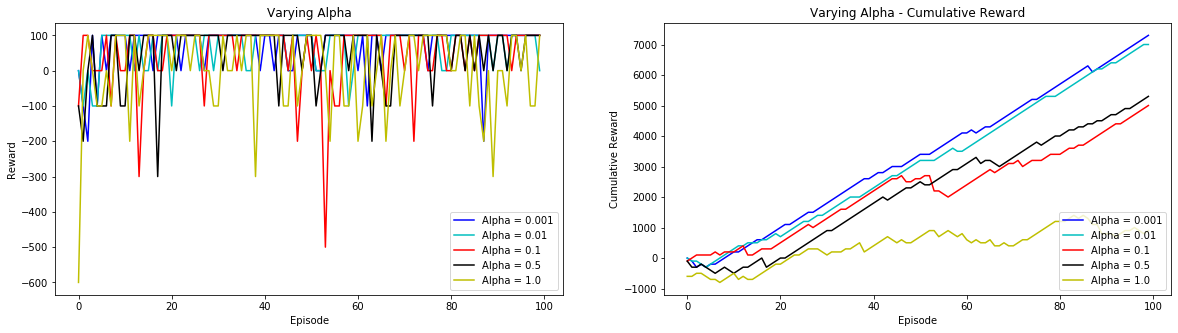

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot( tList,alpha1,label = 'Alpha = 0.001', color = 'b')
plt.plot( tList,alpha2,label = 'Alpha = 0.01', color = 'c')
plt.plot( tList,alpha3,label = 'Alpha = 0.1', color = 'r')
plt.plot( tList,alpha4,label = 'Alpha = 0.5', color = 'k')
plt.plot( tList,alpha5,label = 'Alpha = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Alpha')
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.subplot(1,2,2)
plt.plot( tList,cumalpha1,label = 'Alpha = 0.001', color = 'b')
plt.plot( tList,cumalpha2,label = 'Alpha = 0.01', color = 'c')
plt.plot( tList,cumalpha3,label = 'Alpha = 0.1', color = 'r')
plt.plot( tList,cumalpha4,label = 'Alpha = 0.5', color = 'k')
plt.plot( tList,cumalpha5,label = 'Alpha = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Alpha - Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

### Vary Gamma

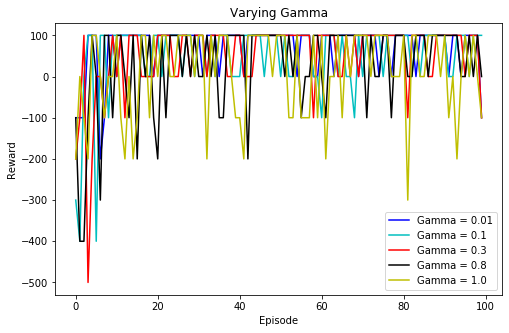

In [62]:
# Learning params
alpha = 0.9
gammas = [0.01, 0.1, 0.3, 0.8, 1.0]
epsilon = 0.9
decay = 0.999 

(S, A, R, goal_state) = environment()

gammaRewards = {0.01: [], 0.1: [], 0.3: [], 0.8: [], 1.0: []}

# Run
for gamma in gammas:
    # Q matrix
    Q = np.zeros(R.shape)
    # Results
    
    episodes = []
    tList = []
    rList = []
    for episode in range(100):

        #s = np.random.choice(len(S))
        s = 0
        #print("Starting state is '{}'".format(S[s]))
        rAll = 0;
        for timestep in range(500): 
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            if np.random.uniform() > epsilon:
                a = np.random.choice(available_actions)
            else:
                a = np.random.choice(best_actions)

            # Environment updating
            r = R[s,a]
            s_old = s
            s = a 

            # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
            rAll = rAll + r
            if S[s] == goal_state:
                break 
        epsilon = epsilon * decay 
        tList.append(episode)
        rList.append(rAll)
    # Store gamma values
    gammaRewards[gamma].append(rList)

# reward
gamma1 = flattenList(gammaRewards[0.01])
gamma2 = flattenList(gammaRewards[0.1])
gamma3 = flattenList(gammaRewards[0.3])
gamma4 = flattenList(gammaRewards[0.8])
gamma5 = flattenList(gammaRewards[1.0])

# test gamma
plt.figure(figsize=(8,5))
plt.plot( tList,gamma1,label = 'Gamma = 0.01', color = 'b')
plt.plot( tList,gamma2,label = 'Gamma = 0.1', color = 'c')
plt.plot( tList,gamma3,label = 'Gamma = 0.3', color = 'r')
plt.plot( tList,gamma4,label = 'Gamma = 0.8', color = 'k')
plt.plot( tList,gamma5,label = 'Gamma = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Gamma')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()



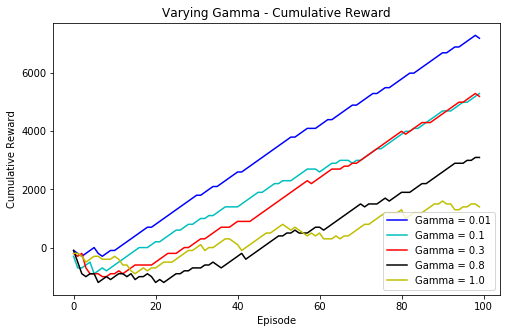

In [63]:
cumgamma1 = np.cumsum(gamma1)
cumgamma2 = np.cumsum(gamma2)
cumgamma3 = np.cumsum(gamma3)
cumgamma4 = np.cumsum(gamma4)
cumgamma5 = np.cumsum(gamma5)



# test gamma
plt.figure(figsize=(8,5))
plt.plot( tList,cumgamma1,label = 'Gamma = 0.01', color = 'b')
plt.plot( tList,cumgamma2,label = 'Gamma = 0.1', color = 'c')
plt.plot( tList,cumgamma3,label = 'Gamma = 0.3', color = 'r')
plt.plot( tList,cumgamma4,label = 'Gamma = 0.8', color = 'k')
plt.plot( tList,cumgamma5,label = 'Gamma = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Gamma - Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

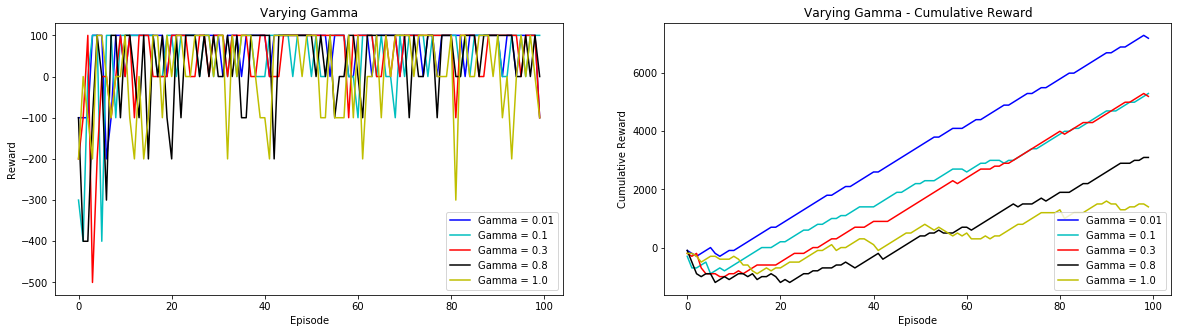

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot( tList,gamma1,label = 'Gamma = 0.01', color = 'b')
plt.plot( tList,gamma2,label = 'Gamma = 0.1', color = 'c')
plt.plot( tList,gamma3,label = 'Gamma = 0.3', color = 'r')
plt.plot( tList,gamma4,label = 'Gamma = 0.8', color = 'k')
plt.plot( tList,gamma5,label = 'Gamma = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Gamma')
plt.xlabel('Episode')
plt.ylabel('Reward')


plt.subplot(1,2,2)
plt.plot( tList,cumgamma1,label = 'Gamma = 0.01', color = 'b')
plt.plot( tList,cumgamma2,label = 'Gamma = 0.1', color = 'c')
plt.plot( tList,cumgamma3,label = 'Gamma = 0.3', color = 'r')
plt.plot( tList,cumgamma4,label = 'Gamma = 0.8', color = 'k')
plt.plot( tList,cumgamma5,label = 'Gamma = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Gamma - Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

### Vary Epsilon

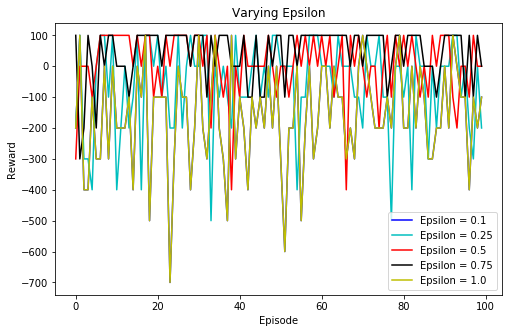

In [73]:
# Learning params
alpha = 0.9
gamma = 0.8
epsilons = [0.1, 0.25, 0.5, 0.75, 1]
decay = 0.999 

(S, A, R, goal_state) = environment()

epsilonRewards = {0.1: [], 0.25: [], 0.5: [], 0.75: [], 1: []}

# Run
for epsilon in epsilons:
    # Q matrix
    Q = np.zeros(R.shape)
    # Results
    
    episodes = []
    tList = []
    rList = []
    x = epsilon
    for episode in range(100):
        #s = np.random.choice(len(S))
        s = 0
        #print("Starting state is '{}'".format(S[s]))
        rAll = 0;
        for timestep in range(500): 
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            if np.random.uniform() > epsilon:
                a = np.random.choice(available_actions)
            else:
                a = np.random.choice(best_actions)

            # Environment updating
            r = R[s,a]
            s_old = s
            s = a 

            # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
            rAll = rAll + r
            if S[s] == goal_state:
                break 
        epsilon = epsilon * decay 
        tList.append(episode)
        rList.append(rAll)
    # Store epsilon values
    epsilonRewards[x].append(rList)

# reward
epsilon1 = flattenList(epsilonRewards[0.1])
epsilon2 = flattenList(epsilonRewards[0.25])
epsilon3 = flattenList(epsilonRewards[0.5])
epsilon4 = flattenList(epsilonRewards[0.75])
epsilon5 = flattenList(epsilonRewards[0.1])

# test epsilon
plt.figure(figsize=(8,5))
plt.plot( tList,epsilon1,label = 'Epsilon = 0.1', color = 'b')
plt.plot( tList,epsilon2,label = 'Epsilon = 0.25', color = 'c')
plt.plot( tList,epsilon3,label = 'Epsilon = 0.5', color = 'r')
plt.plot( tList,epsilon4,label = 'Epsilon = 0.75', color = 'k')
plt.plot( tList,epsilon5,label = 'Epsilon = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Epsilon')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

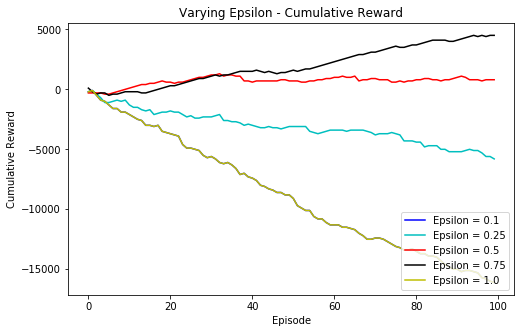

In [74]:
cumepsilon1 = np.cumsum(epsilon1)
cumepsilon2 = np.cumsum(epsilon2)
cumepsilon3 = np.cumsum(epsilon3)
cumepsilon4 = np.cumsum(epsilon4)
cumepsilon5 = np.cumsum(epsilon5)




# test epsilon
plt.figure(figsize=(8,5))
plt.plot( tList,cumepsilon1,label = 'Epsilon = 0.1', color = 'b')
plt.plot( tList,cumepsilon2,label = 'Epsilon = 0.25', color = 'c')
plt.plot( tList,cumepsilon3,label = 'Epsilon = 0.5', color = 'r')
plt.plot( tList,cumepsilon4,label = 'Epsilon = 0.75', color = 'k')
plt.plot( tList,cumepsilon5,label = 'Epsilon = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Epsilon - Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

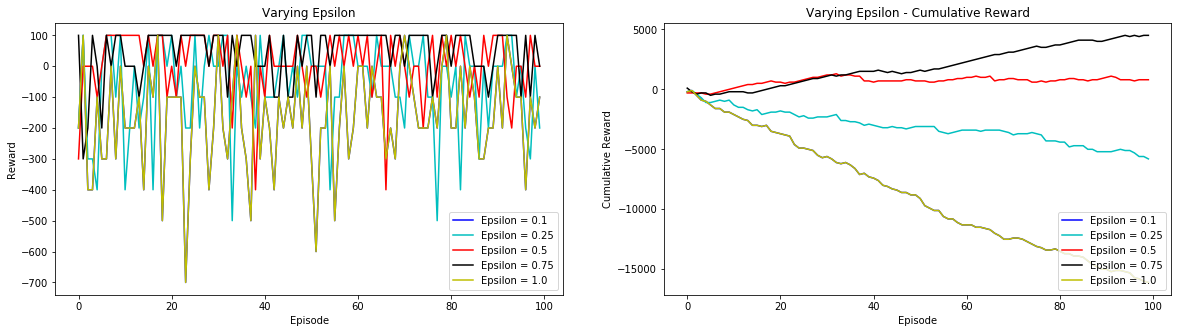

In [75]:
#Combine the plots 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot( tList,epsilon1,label = 'Epsilon = 0.1', color = 'b')
plt.plot( tList,epsilon2,label = 'Epsilon = 0.25', color = 'c')
plt.plot( tList,epsilon3,label = 'Epsilon = 0.5', color = 'r')
plt.plot( tList,epsilon4,label = 'Epsilon = 0.75', color = 'k')
plt.plot( tList,epsilon5,label = 'Epsilon = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Epsilon')
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.subplot(1,2,2)
plt.plot( tList,cumepsilon1,label = 'Epsilon = 0.1', color = 'b')
plt.plot( tList,cumepsilon2,label = 'Epsilon = 0.25', color = 'c')
plt.plot( tList,cumepsilon3,label = 'Epsilon = 0.5', color = 'r')
plt.plot( tList,cumepsilon4,label = 'Epsilon = 0.75', color = 'k')
plt.plot( tList,cumepsilon5,label = 'Epsilon = 1.0', color = 'y')
plt.legend(loc=4)
plt.title('Varying Epsilon - Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

### Vary decay factor

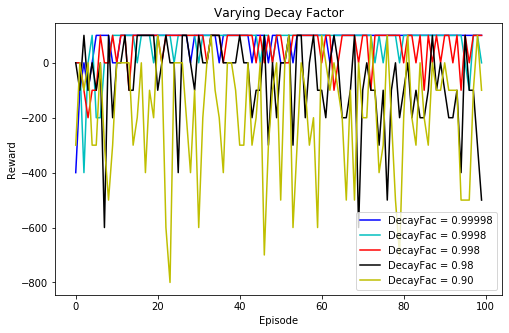

In [76]:
# Learning params
alpha = 0.9
gamma = 0.8
epsilon = 0.9
decays = [0.99998, 0.9998, 0.998, 0.98, 0.90]

(S, A, R, goal_state) = environment()

decayRewards = {0.99998: [], 0.9998: [], 0.998: [], 0.98: [], 0.90: []}

# Run
for decay in decays:
    # Q matrix
    Q = np.zeros(R.shape)
    # Results
    
    episodes = []
    tList = []
    rList = []
    for episode in range(100):
        #s = np.random.choice(len(S))
        s = 0
        #print("Starting state is '{}'".format(S[s]))
        rAll = 0;
        for timestep in range(500): 
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            if np.random.uniform() > epsilon:
                a = np.random.choice(available_actions)
            else:
                a = np.random.choice(best_actions)

            # Environment updating
            r = R[s,a]
            s_old = s
            s = a 

            # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
            rAll = rAll + r
            if S[s] == goal_state:
                break 
        epsilon = epsilon * decay 
        tList.append(episode)
        rList.append(rAll)
    # Store decay values
    decayRewards[decay].append(rList)

# reward
decay1 = flattenList(decayRewards[0.99998])
decay2 = flattenList(decayRewards[0.9998])
decay3 = flattenList(decayRewards[0.998])
decay4 = flattenList(decayRewards[0.98])
decay5 = flattenList(decayRewards[0.90])

# test decay
plt.figure(figsize=(8,5))
plt.plot( tList,decay1,label = 'DecayFac = 0.99998', color = 'b')
plt.plot( tList,decay2,label = 'DecayFac = 0.9998',color = 'c')
plt.plot( tList,decay3,label = 'DecayFac = 0.998',color = 'r')
plt.plot( tList,decay4,label = 'DecayFac = 0.98',color = 'k')
plt.plot( tList,decay5,label = 'DecayFac = 0.90', color = 'y')
plt.legend(loc=4)
plt.title('Varying Decay Factor')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

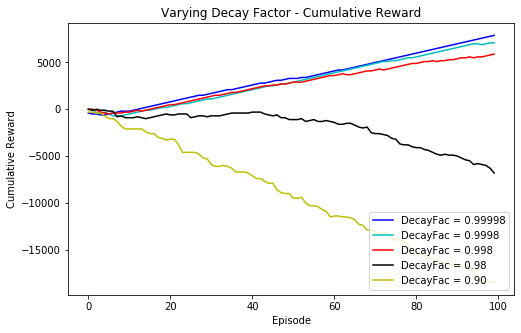

In [77]:
cumdecay1 = np.cumsum(decay1)
cumdecay2 = np.cumsum(decay2)
cumdecay3 = np.cumsum(decay3)
cumdecay4 = np.cumsum(decay4)
cumdecay5 = np.cumsum(decay5)


# test decay
plt.figure(figsize=(8,5))
plt.plot( tList,cumdecay1,label = 'DecayFac = 0.99998', color = 'b')
plt.plot( tList,cumdecay2,label = 'DecayFac = 0.9998',color = 'c')
plt.plot( tList,cumdecay3,label = 'DecayFac = 0.998',color = 'r')
plt.plot( tList,cumdecay4,label = 'DecayFac = 0.98',color = 'k')
plt.plot( tList,cumdecay5,label = 'DecayFac = 0.90', color = 'y')
plt.legend(loc=4)
plt.title('Varying Decay Factor - Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

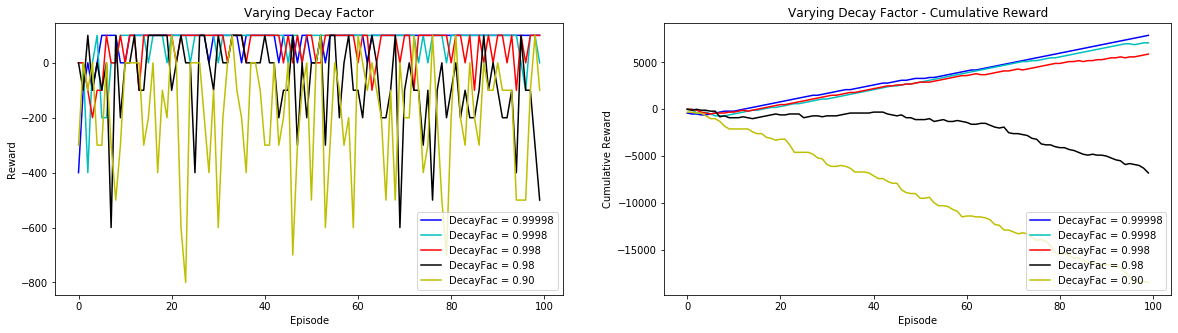

In [78]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot( tList,decay1,label = 'DecayFac = 0.99998', color = 'b')
plt.plot( tList,decay2,label = 'DecayFac = 0.9998',color = 'c')
plt.plot( tList,decay3,label = 'DecayFac = 0.998',color = 'r')
plt.plot( tList,decay4,label = 'DecayFac = 0.98',color = 'k')
plt.plot( tList,decay5,label = 'DecayFac = 0.90', color = 'y')
plt.legend(loc=4)
plt.title('Varying Decay Factor')
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.subplot(1,2,2)
plt.plot( tList,cumdecay1,label = 'DecayFac = 0.99998', color = 'b')
plt.plot( tList,cumdecay2,label = 'DecayFac = 0.9998',color = 'c')
plt.plot( tList,cumdecay3,label = 'DecayFac = 0.998',color = 'r')
plt.plot( tList,cumdecay4,label = 'DecayFac = 0.98',color = 'k')
plt.plot( tList,cumdecay5,label = 'DecayFac = 0.90', color = 'y')
plt.legend(loc=4)
plt.title('Varying Decay Factor - Cumulative Reward')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

# Advanced Task

Code has been adapted from Lab 06 - using TensorFlow
 and https://github.com/SiddharthSingi/Reinforcement-Learning-Breakout

#### Import packages

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import cv2
import random
import gym
import math
import keyboard
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Activation, Flatten
from keras.initializers import TruncatedNormal, Zeros
from keras.optimizers import Adam, SGD
from collections import deque

## Q Network

In [ ]:
# Define QNetwork
class QNetwork():

    def __init__(self, input_shape=(84, 84, 4), num_actions=3, learn_rate=0.00003):
        self.num_actions = num_actions
        self.learning_rate = learn_rate
        self.behaviour_model = self.build_net()
        self.target_model = self.build_net()
        self.target_model.set_weights(self.behaviour_model.get_weights())

    def build_net(self):
        #create layers for deep learning
        model = Sequential()
        model.add(Dense(units = 100, activation='relu', input_shape=(2,)))
        model.add(Dense(self.num_actions, activation='linear'))
        #Use adam optimiser 
        adam = Adam(lr=self.learning_rate)
        model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

        return model

    def pred_q_values(self, input_state, model_type):

        if model_type == 'behaviour':
            action_values = self.behaviour_model.predict(input_state)
            q_max = np.max(action_values, axis=1)
            max_q_ind = np.argmax(action_values, axis=1)
        elif model_type == 'target':
            action_values = self.target_model.predict(input_state)
            q_max = np.max(action_values, axis=1)
            max_q_ind = np.argmax(action_values, axis=1)
        else:
            print('Please enter valid model type')

        return action_values, q_max, max_q_ind

    def update_target_model(self):
        self.target_model.set_weights(self.behaviour_model.get_weights())

def print_trainable(self):

    for var in tf.trainable_variables():
        print(var)

# Replay Memory

### SumTree Implementation 

Code adapted from: https://github.com/jaromiru/AIblog/blob/348628b105058d876001ca758b6ba59fb1726614/SumTree.py#L3

In [ ]:
class SumTree:
    write = 0

    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.populated_tree = False

    def _propagate(self, idx, change):
        parent = (idx - 1) // 2
        self.tree[parent] += change
        if parent != 0:
            self._propagate(parent, change)

    def _retrieve(self, idx, s):
        left = 2 * idx + 1
        right = left + 1

        if left >= len(self.tree):
            return idx
        
        if s <= self.tree[left]:
            return self._retrieve(left, s)
        else:
            return self._retrieve(right, s-self.tree[left])

    def total(self):
        return self.tree[0]

    def add(self, p, data):
        idx = self.write + self.capacity - 1
        self.data[self.write] = data
        self.update(idx, p)
        self.write += 1
        
        if self.write >= self.capacity:
            self.write = 0
            self.populated_tree = True

    def update(self, idx, p):
        change = p - self.tree[idx]
        self.tree[idx] = p
        self._propagate(idx, change)

    def get(self, s):
        idx = self._retrieve(0, s)
        dataIdx = idx - self.capacity + 1
        return (idx, self.tree[idx], self.data[dataIdx])

### Store the experience

In [ ]:
class ReplayMemory:

    def __init__(self, memory_capacity):
        #will consist of all the frames played by the agent. 
        self.frames = deque([], maxlen=memory_capacity)
        #others will consists of [rewards, actions, terminations]
        # it will have the same legnth as that of self.frames
        self.others = deque([], maxlen=memory_capacity)
        # this will be used in the environment which is MountainCar
        self.memory = deque([], maxlen=memory_capacity)

    # uint values will be stored here. Normalization of the values will only be performed during training and testing
    def add(self, new_frame, reward, action, termination):
        gray = self.preprocess_image(new_frame)
        self.frames.append(gray)
        self.others.append([reward, action, termination])

    # state shape is (84,84,4)
    def get_latest_state(self):
        imgs = [self.frames[-4+i] for i in range(4)]
        state = np.stack(imgs, axis=2)
        return state
    def clear_replay_memory(self):
        self.frames.clear()
        self.others.clear()

    def get_state_from_indices(self, frame_indices):
        states = []

        for i in frame_indices:
            # last frame is with index i
            state = [self.frames[i-3+j] for j in range(4)]
            state = np.stack(state, axis=2)
            states.append(state)

        states = np.asarray(states)

        return states

    # define the number of epochs
    # future_frames are used to train the model
    def get_sample(self, frame_indices):

        current_states = self.get_state_from_indices(frame_indices)
        # list of [rewards, actions, terminations] for all frame_indices
        current_info = [self.others[i] for i in frame_indices]
        future_frame_indices = [i+1 for i in frame_indices]
        future_states = self.get_state_from_indices(future_frame_indices)
        return current_states, current_info, future_states

    def get_sample_mountaincar(self, indices):
        # replay memory consists of state, action, reward, future_states, termination
        current_states = []
        actions = []
        rewards = []
        future_states = []
        terminations = []

        for i in indices:
            current_states.append(self.memory[i][0])
            actions.append(self.memory[i][1])
            rewards.append(self.memory[i][2])
            future_states.append(self.memory[i][3])
            terminations.append(self.memory[i][4])
        current_states = np.asarray(current_states)
        actions = np.asarray(actions)
        rewards = np.asarray(rewards)
        future_states = np.asarray(future_states)
        terminations = np.asarray(terminations)
        return current_states, actions, rewards, future_states, terminations

    #preprocessing of the training image whilst MountainCar is training
    @staticmethod
    def preprocess_image(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = gray[30:195, :]
        gray = cv2.resize(gray, (84, 84), interpolation=cv2.INTER_CUBIC)
        return (gray)

In [ ]:
#Create a separate memory function for Prioritized Experience Replay to store the values as above
class ReplayMemoryForPER:

    def __init__(self, capacity):
        self.tree = SumTree(capacity)

        self.abs_upper_error = 1.0
        #Define the variables for the Prioritized Experience Replay
        self.PER_b = 0.5
        # how much the value must increment per step
        self.PER_b_increment = 0.001
        # Hyper parameter to tune replay memory between prioritization and random sampling
        self.PER_a = 0.4
        # minimum constant to add to errors to maintain nonzero value
        self.PER_e = 0.01

    def add(self, transition):
        # initialise with max priority to ensure these are trained
        max_priority = np.max(self.tree.tree[-self.tree.capacity:])
        if max_priority == 0:
            max_priority = self.abs_upper_error

        self.tree.add(max_priority, transition)

    def update_tree(self, tree_indices, absolute_errors):
        absolute_errors += self.PER_e
        clipped_errors = np.minimum(absolute_errors, self.abs_upper_error)
        priorities = np.power(clipped_errors, self.PER_a)

        for idx, priority in zip(tree_indices, priorities):
            self.tree.update(idx, priority)

    def sample(self, n):

        self.PER_b = np.min([1.0, self.PER_b + self.PER_b_increment])
        priority_slice = self.tree.total() / n
        
        if self.tree.populated_tree:
            min_priority = np.min(self.tree.tree[-self.tree.capacity:])
        else:
            min_priority = np.min(self.tree.tree[-self.tree.capacity:-self.tree.capacity + self.tree.write])
        
        if min_priority==0:
            min_priority = 0.001
        max_ISweight = np.power(n*min_priority, -self.PER_b)

        batch_ISweights = np.empty(n, dtype=np.float32)
        batch_tree_indices = np.empty(n, dtype=np.int32)
        batch_data = []

        for i in range(n):
            a, b = i*priority_slice, (i+1)*priority_slice
            r = random.uniform(a, b)

            idx, priority, data = self.tree.get(r)

            # ISweights are divided by max weight in order to avoid very large values
            batch_ISweights[i] = np.power((n*priority), -self.PER_b) / max_ISweight
            batch_tree_indices[i] = idx
            batch_data.append(data)

        return batch_tree_indices, batch_ISweights, batch_data

## DQN

Code adapted from: https://github.com/adibyte95/Mountain_car-OpenAI-GYM/blob/master/prog.py

In [ ]:
# possible actions for the env are: ['NOOP', "RIGHT", 'LEFT']
class DQNAgent():

    def __init__(self):

        # Parameters that are used to train the agent are defined below
        self.save_model_as = 'DQNTest.h5' #save the trained models in a .h5 file
        self.load_model_from = 'DQNTest.h5'  
        self.use_previous_model = True
        self.Qnet = QNetwork()
        self.env = gym.make('MountainCar-v0') #load the mountain car environment
        self.replay_mem = ReplayMemory(50000) #set the replay memory as 50,000. Lower values do not show valuable results. Tutorial 6 stated to keep a maximum of 20000
        self.save_model_every = 50  # number of episodes to save the model
        self.max_steps = 2000
        self.num_actions = 3 #the agent can only take 3 possible actions, nothing, left or right
        self.render = True
        self.gamma = 0.97 # Gamma value for calculating td(0) target
        self.max_episodes = 250 #define the maximum number of episodes 
        self.history_len = 4  # taken from (84,84,4)
        self.update_target_every = 5  # set the number of episodes to update the target
        self.train_model_every = 1500  # number of trials to train the behaviour model in
        self.batch_size = 16  # batch size for training the behaviour model
        self.stats_every = 5  # number of episodes to take the stats in, the output will be in a graph
        self.stats = {'EpisodeCount': [], 'Average': [], 'MaxReward': [], 'MinReward': [], 'AverageLength': [], 'Epsilon': []}
        self.EPS_START = 1.0 #set the max epsilon value
        self.EPS_END = 0.01 #set the min epsilon value
        self.LAMBDA = 0.0001
        self.EPS_DECAY = 10000 #set the rate at how the epsilon value will decay
        self.EPS_BASE = self.EPS_END / self.EPS_START


    def load_prev_weights(self):
        if self.use_previous_model:
            self.Qnet.behaviour_model.load_weights(self.load_model_from)
            self.Qnet.target_model.load_weights(self.load_model_from)

    def choose_action(self, state, trial_num):

        # below shows how the epsilon value will decay
        epsilon_thresh = self.EPS_END + (self.EPS_START - self.EPS_END) * math.exp(-self.LAMBDA * trial_num)

        epsilon = random.random()

        if epsilon < epsilon_thresh:
            # For Debugging
            random_choice = True
            return random.randint(0, self.num_actions - 1), epsilon_thresh, random_choice
        else:
            # For Debugging
            random_choice = False
            state = np.expand_dims(state, axis=0)
            action_values, q_max, max_q_ind = self.Qnet.pred_q_values(state, 'behaviour')
            return int(max_q_ind), epsilon_thresh, random_choice
        
    #define the function to train the model
    def train_model_mountain(self):
        if len(self.replay_mem.memory) < self.batch_size:
            print('More Samples Required!')
        else:
            # Generate self.batch_size random numbers from length of replay_mem
            # Transitions to train on
            indices_to_train = np.random.randint(len(self.replay_mem.memory)-1, size=self.batch_size)
            current_states, actions, rewards, future_states, terminations = self.replay_mem.get_sample_mountaincar(indices_to_train)
           
            current_qs, _, _ = self.Qnet.pred_q_values(current_states, 'behaviour')
            future_qs, _, _ = self.Qnet.pred_q_values(future_states, 'target')
            max_future_qs = np.max(future_qs, axis=1)
            for i in range(self.batch_size):
                if terminations[i]:
                    td_target = rewards[i]
                else:
                    td_target = rewards[i] + self.gamma*max_future_qs[i]

                current_qs[i][actions[i]] = td_target

            self.Qnet.behaviour_model.fit(x=current_states, y=current_qs, verbose=0)

    def run(self):

        trial_num = 0
        ep_rewards = []
        ep_lengths = []

        for episode in range(self.max_episodes):
            state = self.env.reset()
            episode_reward = 0
            
            if episode % self.update_target_every:
                self.Qnet.target_model.set_weights(self.Qnet.behaviour_model.get_weights())

            for step in range(self.max_steps):

                action, epsilon_thresh, _ = self.choose_action(state, trial_num)
                trial_num += 1
                self.env.render()

                new_state, reward, termination, info = self.env.step(action=action)
                #as stated in the report we will be changing the reward structure to ensure the agent trains quicker in the environment.
                #the agent gets a reward for moving to the left hill as the car needs momentum to get up the right hill 
                if new_state[0] >= -0.1:
                    reward += 10
                elif new_state[0] >= 0.1:
                    reward += 30
                elif new_state[0] >= 0.3:
                    reward += 50
                elif new_state[0] >= 0.5:
                    reward += 100

                episode_reward+=reward

                self.replay_mem.memory.append([state, action, reward, new_state, termination])

                self.train_model_mountain()
                state = new_state

                if termination:
                    self.env.close()
                    ep_rewards.append(episode_reward)
                    ep_lengths.append(step)
                    break

            # create the results that will be used to plot the graph         
            if episode % self.stats_every == 0:
                avg_reward = sum(ep_rewards[-self.stats_every:]) / self.stats_every
                avg_len = sum(ep_lengths[-self.stats_every:]) / self.stats_every
                self.stats['EpisodeCount'].append(episode)
                self.stats['Average'].append(avg_reward)
                self.stats['MaxReward'].append(max(ep_rewards[-self.stats_every:], default=0))
                self.stats['MinReward'].append(min(ep_rewards[-self.stats_every:], default=0))
                self.stats['AverageLength'].append(avg_len)
                self.stats['Epsilon'].append(epsilon_thresh)

            if episode % self.save_model_every:
                self.Qnet.behaviour_model.save(self.save_model_as)

        #Plot results as a graph 
        sns.set_style("dark")
        plt.figure(figsize=(10,10))
        plt.subplot(3,1,1)
        plt.plot(self.stats['EpisodeCount'], self.stats['Average'], label="Rewards: avg", color='b')
        plt.plot(self.stats['EpisodeCount'], self.stats['MaxReward'], label="Rewards: max", color='c')
        plt.plot(self.stats['EpisodeCount'], self.stats['MinReward'], label="Rewards: min", color='r')
        plt.gca().set_title('Rewards')
        plt.legend(bbox_to_anchor=(1.19, 1),  borderaxespad=0)
        plt.subplot(3,1,2)
        plt.plot(self.stats['EpisodeCount'], self.stats['AverageLength'], label="Episode: Length", color='k')
        plt.gca().set_title('Episodes')
        plt.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)
        plt.subplot(3,1,3)
        plt.plot(self.stats['EpisodeCount'], self.stats['Epsilon'], label='Episode: Threshold', color='y')
        plt.legend(bbox_to_anchor=(1.23, 1), borderaxespad=0)
        plt.savefig('DQNTestPlot.jpg', bbox_inches='tight')
        plt.close()

agent = DQNAgent()
agent.run()

## DDQN

In [ ]:
# possible actions for the env are: ['NOOP', "RIGHT", 'LEFT']
class DDQNAgent():

    def __init__(self):

        # Parameters that are used to train the agent are defined below
        self.save_model_as = 'DDQNTest.h5' #save the trained models in a .h5 file
        self.load_model_from = 'DDQNTest.h5'  
        self.use_previous_model = True
        self.Qnet = QNetwork()
        self.env = gym.make('MountainCar-v0') #load the mountain car environment
        self.replay_mem = ReplayMemory(50000)
        self.save_model_every = 50  # number of episodes to save the model
        self.max_steps = 2000
        self.num_actions = 3
        self.render = True
        self.gamma = 0.995  # Gamma value for calculating td(0) target
        self.max_episodes = 250 #define the maximum number of episodes 
        self.history_len = 4  # taken from (84,84,4)
        self.update_target_every = 25  # number of episodes to update the target network in
        self.train_model_every = 1500  # number of trials to train the behaviour model in
        self.batch_size = 25  # batch size for training the behaviour model
        self.stats_every = 10  # number of episodes to take the stats in, the output will be in a graph
        self.stats = {'EpisodeCount': [], 'Average': [], 'MaxReward': [], 'MinReward': [], 'AverageLength': [], 'Epsilon': []}
        self.key_control = {'left': 0, 'stay': 1, 'right': 2}
        self.EPS_START = 1.0 #set the max epsilon value
        self.EPS_END = 0.01 #set the min epsilon value
        self.LAMBDA = 0.0001
        self.EPS_DECAY = 1000 #set the rate at how the epsilon value will decay
        self.EPS_BASE = self.EPS_END / self.EPS_START

    def load_prev_weights(self):
        if self.use_previous_model:
            self.Qnet.behaviour_model.load_weights(self.load_model_from)
            self.Qnet.target_model.load_weights(self.load_model_from)

     # Define the action       
    def choose_action(self, state, trial_num):

        # below shows how the epsilon value will decay
        epsilon_thresh = self.EPS_END + (self.EPS_START - self.EPS_END) * math.exp(-self.LAMBDA * trial_num)

        epsilon = random.random()

        if epsilon < epsilon_thresh:
            # For Debugging
            random_choice = True
            return random.randint(0, self.num_actions - 1), epsilon_thresh, random_choice
        else:
            # For Debugging
            random_choice = False
            state = np.expand_dims(state, axis=0)
            action_values, q_max, max_q_ind = self.Qnet.pred_q_values(state, 'behaviour')
            return int(max_q_ind), epsilon_thresh, random_choice

    def train_model_mountain(self):
        if len(self.replay_mem.memory) < self.batch_size:
            print('More Samples Required!')
        else:

            indices_to_train = np.random.randint(len(self.replay_mem.memory)-1, size=self.batch_size)
            current_states, actions, rewards, future_states, terminations = self.replay_mem.get_sample_mountaincar(indices_to_train)


            current_qs = self.Qnet.behaviour_model.predict(current_states)


            future_behaviour_qs = self.Qnet.behaviour_model.predict(future_states)
            future_beh_best_action = np.argmax(future_behaviour_qs, axis=1)


            future_target_qs = self.Qnet.target_model.predict(future_states)

            DDQN_targets = np.copy(current_qs)
            for i, action in enumerate(future_beh_best_action):
                if terminations[i]:
                    target = rewards[i]
                else:
                    target = rewards[i] + self.gamma * future_target_qs[i][action]
                DDQN_targets[i][actions[i]] = target

            self.Qnet.behaviour_model.fit(current_states, DDQN_targets, verbose=0)


    def run(self):

        trial_num = 0
        ep_rewards = []
        ep_lengths = []

        for episode in range(self.max_episodes):
            state = self.env.reset()
            episode_reward = 0
            
            if episode % self.update_target_every:
                self.Qnet.target_model.set_weights(self.Qnet.behaviour_model.get_weights())

            for step in range(self.max_steps):

                action, epsilon_thresh, _ = self.choose_action(state, trial_num)
                trial_num += 1
                self.env.render()

                new_state, reward, termination, info = self.env.step(action=action)
                #as stated in the report we will be changing the reward structure to ensure the agent trains quicker in the environment.
                #the agent gets a reward for moving to the left hill as the car needs momentum to get up the right hill 
                if new_state[0] >= -0.1:
                    reward += 10
                elif new_state[0] >= 0.1:
                    reward += 30
                elif new_state[0] >= 0.3:
                    reward += 50
                elif new_state[0] >= 0.5:
                    reward += 100

                episode_reward+=reward

                # Adding state, action, reward, new_state, termination
                self.replay_mem.memory.append([state, action, reward, new_state, termination])

                self.train_model_mountain()
                state = new_state

                if termination:
                    self.env.close()
                    ep_rewards.append(episode_reward)
                    ep_lengths.append(step)
                    break

            # create the results that will be used to plot the graph 
            if episode % self.stats_every == 0:
                avg_reward = sum(ep_rewards[-self.stats_every:]) / self.stats_every
                avg_len = sum(ep_lengths[-self.stats_every:]) / self.stats_every
                self.stats['EpisodeCount'].append(episode)
                self.stats['Average'].append(avg_reward)
                self.stats['MaxReward'].append(max(ep_rewards[-self.stats_every:], default=0))
                self.stats['MinReward'].append(min(ep_rewards[-self.stats_every:], default=0))
                self.stats['AverageLength'].append(avg_len)
                self.stats['Epsilon'].append(epsilon_thresh)

            if episode % self.save_model_every:
                self.Qnet.behaviour_model.save(self.save_model_as)

        #Plot results
        sns.set_style("dark")
        plt.figure(figsize=(10,10))
        plt.subplot(3,1,1)
        plt.plot(self.stats['EpisodeCount'], self.stats['Average'], label="Rewards: avg", color='b')
        plt.plot(self.stats['EpisodeCount'], self.stats['MaxReward'], label="Rewards: max", color='c')
        plt.plot(self.stats['EpisodeCount'], self.stats['MinReward'], label="Rewards: min", color='r')
        plt.gca().set_title('Rewards')
        plt.legend(bbox_to_anchor=(1.19, 1),  borderaxespad=0)
        plt.subplot(3,1,2)
        plt.plot(self.stats['EpisodeCount'], self.stats['AverageLength'], label="Episode: Length", color='k')
        plt.gca().set_title('Episodes')
        plt.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)
        plt.subplot(3,1,3)
        plt.plot(self.stats['EpisodeCount'], self.stats['Epsilon'], label='Episode: Threshold', color='y')
        plt.legend(bbox_to_anchor=(1.23, 1), borderaxespad=0)
        plt.savefig('DQNTestPlot.jpg', bbox_inches='tight')
        plt.close()

agent = DQNAgent()
agent.run()

## DDQN with Prioritized Experienced Replay

In [ ]:
# possible actions for the env are: ['NOOP', "RIGHT", 'LEFT']
class DDQNAgentWithPER():

    def __init__(self):

        # Parameters that are used to train the agent are defined below
        self.save_model_as = 'DDQNPERTest.h5' #save the trained models in a .h5 file
        self.load_model_from = 'DDQNPERTest.h5'  # should not be empty if self.use_previous_model = True
        self.use_previous_model = True
        self.Qnet = QNetwork()
        self.replay_mem = ReplayMemoryForPER(20000)
        self.env = gym.make('MountainCar-v0')
        self.save_model_every = 50  # number of episodes to save the
        self.max_steps = 2000
        self.num_actions = 3
        self.render = True #to see the agent training in the environment
        self.gamma = 0.995  # Gamma value for calculating td(0) target
        self.max_episodes = 1000
        self.history_len = 4  # taken from (84,84,4)
        self.update_target_every = 25  # number of episodes to update the target network in
        self.train_model_every = 1500  # number of trials to train the behaviour model in
        self.batch_size = 25  # batch size for training the behaviour model
        self.stats_every = 10  # number of episodes to take the stats in, to produce a graph at the end
        self.stats = {'episode': [], 'avg': [], 'max': [], 'min': [], 'avg_len': [], 'epsilon': []}
        self.key_control = {'left': 0, 'stay': 1, 'right': 2}
        self.EPS_START = 1.0 #set the max epsilon value
        self.EPS_END = 0.01 #set the min epsilon value
        self.LAMBDA = 0.0001
        self.EPS_DECAY = 1000 #set the rate at how the epsilon value will decay
        self.EPS_BASE = self.EPS_END / self.EPS_START
        
    def load_prev_weights(self):
        if self.use_previous_model:
            self.Qnet.behaviour_model.load_weights(self.load_model_from)
            self.Qnet.target_model.load_weights(self.load_model_from)
            
            
    # Define the action - epsilon 
    def choose_action(self, state, episode_num):

        # below shows how the epsilon value will decay
        if episode_num < self.EPS_DECAY:
            epsilon_thresh = self.EPS_START * math.pow(self.EPS_BASE, (episode_num / self.EPS_DECAY))
        else:
            epsilon_thresh = self.EPS_END


        epsilon = random.random()
        if epsilon < epsilon_thresh:
            # For Debugging
            random_choice = True
            return random.randint(0, self.num_actions - 1), epsilon_thresh, random_choice
        else:
            # For Debugging
            random_choice = False
            state = np.expand_dims(state, axis=0)
            action_values, q_max, max_q_ind = self.Qnet.pred_q_values(state, 'behaviour')
            return int(max_q_ind), epsilon_thresh, random_choice


   
    def train_model_mountain(self):

        tree_indices, ISweights, batch_data = self.replay_mem.sample(self.batch_size)
        current_states = np.asarray([data[0] for data in batch_data])

        actions = np.asarray([data[1] for data in batch_data])
        rewards = np.asarray([data[2] for data in batch_data])
        future_states = np.asarray([data[3] for data in batch_data])
        terminations = np.asarray([data[4] for data in batch_data])

        # Used in DDQN
        # shape (batch_size, num_actions)
        current_qs = self.Qnet.behaviour_model.predict(current_states)


        future_behaviour_qs = self.Qnet.behaviour_model.predict(future_states)
        future_beh_best_action = np.argmax(future_behaviour_qs, axis=1)

        future_target_qs = self.Qnet.target_model.predict(future_states)

        DDQN_targets = np.copy(current_qs)
        absolute_errors = np.empty((self.batch_size,), dtype=np.float32)
        for i, action in enumerate(future_beh_best_action):
            if terminations[i]:
                target = rewards[i]
            else:
                target = rewards[i] + self.gamma*future_target_qs[i][action]

            absolute_errors[i] = np.abs(target - current_qs[i][actions[i]])
            DDQN_targets[i][actions[i]] = target

        self.Qnet.behaviour_model.fit(current_states, DDQN_targets, sample_weight=ISweights, verbose=0)

        self.replay_mem.update_tree(tree_indices, absolute_errors)

    def run(self):

        trial_num = 0
        ep_rewards = []
        ep_lengths = []

        for episode in range(self.max_episodes):
            state = self.env.reset()
            episode_reward = 0
            if episode % self.update_target_every:
                self.Qnet.update_target_model()

            for step in range(self.max_steps):

                action, epsilon_thresh, _ = self.choose_action(state, episode)
                trial_num += 1
                self.env.render()

                new_state, reward, termination, info = self.env.step(action=action)
                # alternative reward structure as explained above 
                if new_state[0] >= -0.1:
                    reward += 10
                elif new_state[0] >= 0.1:
                    reward += 30
                elif new_state[0] >= 0.3:
                    reward += 50
                elif new_state[0] >= 0.5:
                    reward += 100

                episode_reward+=reward

                # Adding state, action, reward, new_state, termination
                self.replay_mem.add([state, action, reward, new_state, termination])

                self.train_model_mountain()
                state = new_state

                if termination:
                    self.env.close()
                    ep_rewards.append(episode_reward)
                    ep_lengths.append(step)
                    break
            #append values which will be used to plot the graphs
             if episode % self.stats_every == 0:
                avg_reward = sum(ep_rewards[-self.stats_every:]) / self.stats_every
                avg_len = sum(ep_lengths[-self.stats_every:]) / self.stats_every
                self.stats['EpisodeCount'].append(episode)
                self.stats['Average'].append(avg_reward)
                self.stats['MaxReward'].append(max(ep_rewards[-self.stats_every:], default=0))
                self.stats['MinReward'].append(min(ep_rewards[-self.stats_every:], default=0))
                self.stats['AverageLength'].append(avg_len)
                self.stats['Epsilon'].append(epsilon_thresh)

            if episode % self.save_model_every:
                self.Qnet.behaviour_model.save(self.save_model_as)

        #Plot results
        sns.set_style("dark")
        plt.figure(figsize=(10,10))
        plt.subplot(3,1,1)
        plt.plot(self.stats['EpisodeCount'], self.stats['Average'], label="Rewards: avg", color='b')
        plt.plot(self.stats['EpisodeCount'], self.stats['MaxReward'], label="Rewards: max", color='c')
        plt.plot(self.stats['EpisodeCount'], self.stats['MinReward'], label="Rewards: min", color='r')
        plt.gca().set_title('Rewards')
        plt.legend(bbox_to_anchor=(1.19, 1),  borderaxespad=0)
        plt.subplot(3,1,2)
        plt.plot(self.stats['EpisodeCount'], self.stats['AverageLength'], label="Episode: Length", color='k')
        plt.gca().set_title('Episodes')
        plt.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)
        plt.subplot(3,1,3)
        plt.plot(self.stats['EpisodeCount'], self.stats['Epsilon'], label='Episode: Threshold', color='y')
        plt.legend(bbox_to_anchor=(1.23, 1), borderaxespad=0)
        plt.savefig('DQNTestPlot.jpg', bbox_inches='tight')
        plt.close()

agent = DQNAgent()
agent.run()

# Test

In [ ]:
#initialise the environment
env = gym.make('MountainCar-v0')
episodes_to_run = 100
#load the network that needs to be tested
Qnet = load_model('DQNTest.h5')

def choose_action(state):
    state = np.expand_dims(state, axis=0)
    action_values = Qnet.predict(state)
    max_q_ind = np.argmax(action_values, axis=1)
    return int(max_q_ind)

def run():
    #create empty array to store the values
    trial_num = 0
    ep_rewards = []
    ep_lengths = []
    episodes = []

    for episode in range(episodes_to_run):
        state = env.reset()
        episode_reward = 0
        episodes.append(episode)
        for step in range(1000):

            action= choose_action(state)
            trial_num += 1


            new_state, reward, termination, info = env.step(action=action)
            env.render()
            #alternative reward structure as explained above
            if new_state[0] >= -0.1:
                reward += 10
            elif new_state[0] >= 0.1:
                reward += 30
            elif new_state[0] >= 0.3:
                reward += 50
            elif new_state[0] >= 0.5:
                reward += 100
            
            episode_reward += reward

            state = new_state

            if termination:
                env.close()
                ep_rewards.append(episode_reward)
                ep_lengths.append(step)
                print('episode num: ', episode, ' Total Reward: ', episode_reward)
                break

    #Plot test results             
    sns.set_style("dark")
    plt.figure(figsize=(10,10))
    print(episodes)
    print(ep_rewards)
    plt.subplot(2,1,1)
    plt.plot(episodes, ep_rewards, label="Rewards", color='b')
    plt.legend(bbox_to_anchor=(1.19, 1),  borderaxespad=0)
    plt.subplot(2,1,2)
    plt.plot(episodes, ep_lengths, label="Length", color='c')
    plt.legend(bbox_to_anchor=(1.19, 1),  borderaxespad=0)
    plt.savefig('DQNresultsPlot.jpg', bbox_inches='tight')
    plt.close()

run()